# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [7]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import numpy as np # 선형대수학 연산이 가능한 자료구조
import pandas as pd # numpy 바탕으로 테이블형태의 자료구조
import matplotlib.pyplot as plt # MATLAB 시각화 패키지 시각화계의 numpy
import seaborn as sns # 범용적인 시각화툴

plt.rcParams['axes.unicode_minus'] = False # 시각화 표시설정 마이너스 깨짐 방지
plt.rcParams['font.family'] = 'batang' # 시각화 그래프의 폰트 설정

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/energy1.csv', encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


### countplot (막대그래프)
카테고리컬 데이터의 대소비교를 위한 용도로 사용

<AxesSubplot:xlabel='기온(°C)', ylabel='count'>

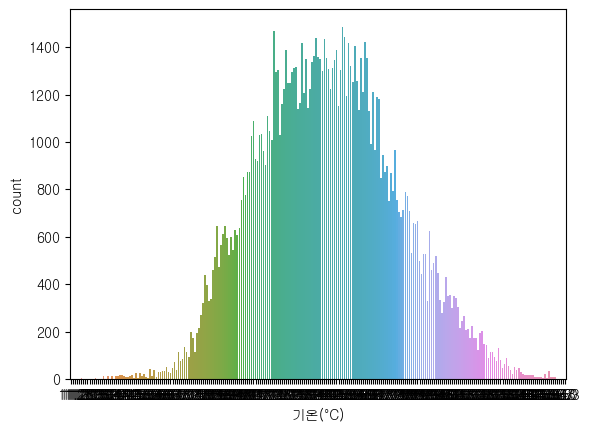

In [13]:
# 쉬운 방법으로 barplot 구현이 가능하다.
import seaborn as sns
plt.rcParams['font.family'] = 'gulim'
sns.countplot(data=df, x='기온(°C)')

### histplot (히스토그램)
연속형데이터의 분포를 확인하는 목적으로 사용

In [15]:
df.rename({'전력사용량(kWh)':'전력사용량',
                  '기온(°C)':'기온',
                  '풍속(m/s)':'풍속',
                  '습도(%)':'습도',
                  '강수량(mm)':'강수량',
                  '일조(hr)':'일조'}, axis=1, inplace=True)

<AxesSubplot:xlabel='풍속', ylabel='Count'>

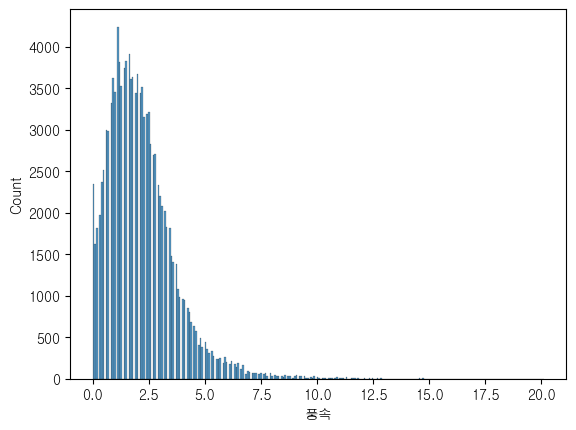

In [17]:
sns.histplot(data=df, x='풍속')

### scatterplot (산점도)
변수와 변수간의 관계를 파악하고자 하는 목적으로 수행,  X, Y축 각각 변수를 위치시켜서 상관관계를 파악하는 목적으로 사용  
분포, 밀도, 이상치 <---- 많은 분석 내용이 파악 분석용 툴로 활용  
변수들은 연속형데이터에 적용하시면 좋습니다.

<AxesSubplot:xlabel='기온', ylabel='전력사용량'>

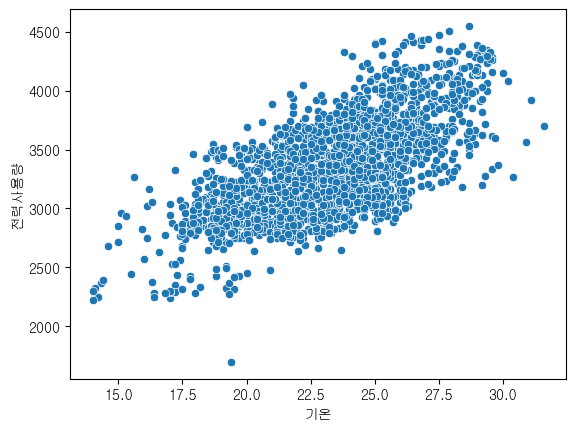

In [30]:
sns.scatterplot(data=df.loc[df['num'] == 60], x='기온', y='전력사용량')

### boxplot
분석용 시각화 도구로 사용을 많이 합니다. 변수와 변수간 관계 파악 목적  
x, y 각각 변수 위치, x(카테고리컬), y(연속형)  
y 데이터의 분포를 박스형태로 구성, 분포와 이상치 판단

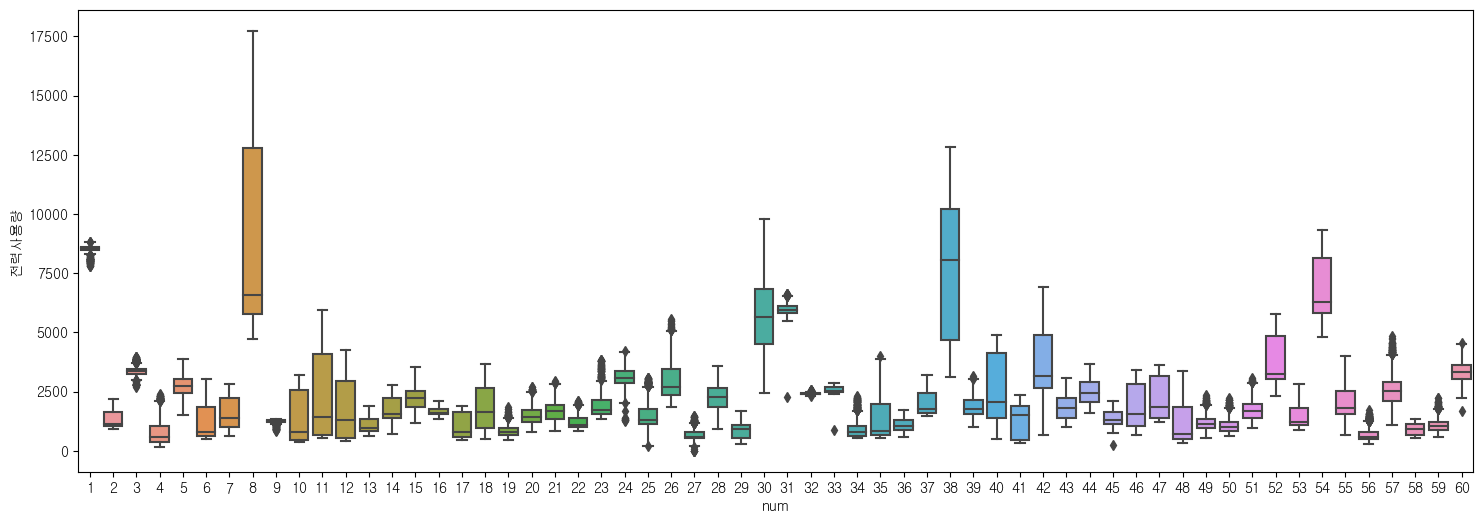

In [32]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
plt.figure(figsize=(18, 6)) # 그래프가 그려지는 도화지 크기 설정 (인치)
sns.boxplot(data=df, x='num', y='전력사용량') # 그래프 설정
plt.show() # 위에서 설정한 그래프 설정 랜더링 (쪼금 더 선명)

# 박스플랏의 분포를 표현하는 박스
# 박스하단 사분위수 25%, 가운데 라인 중앙값, 위쪽 라인 사분위수 75%
# 박스 외부 라인 위쪽라인 iqr(사분위수 * 1.5)
# 이상치 박스 외부에 있는 iqr 범위를 벗어나는 분포의 데이터를 이상치라 판단 (검정색 마름모로 표현)

### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

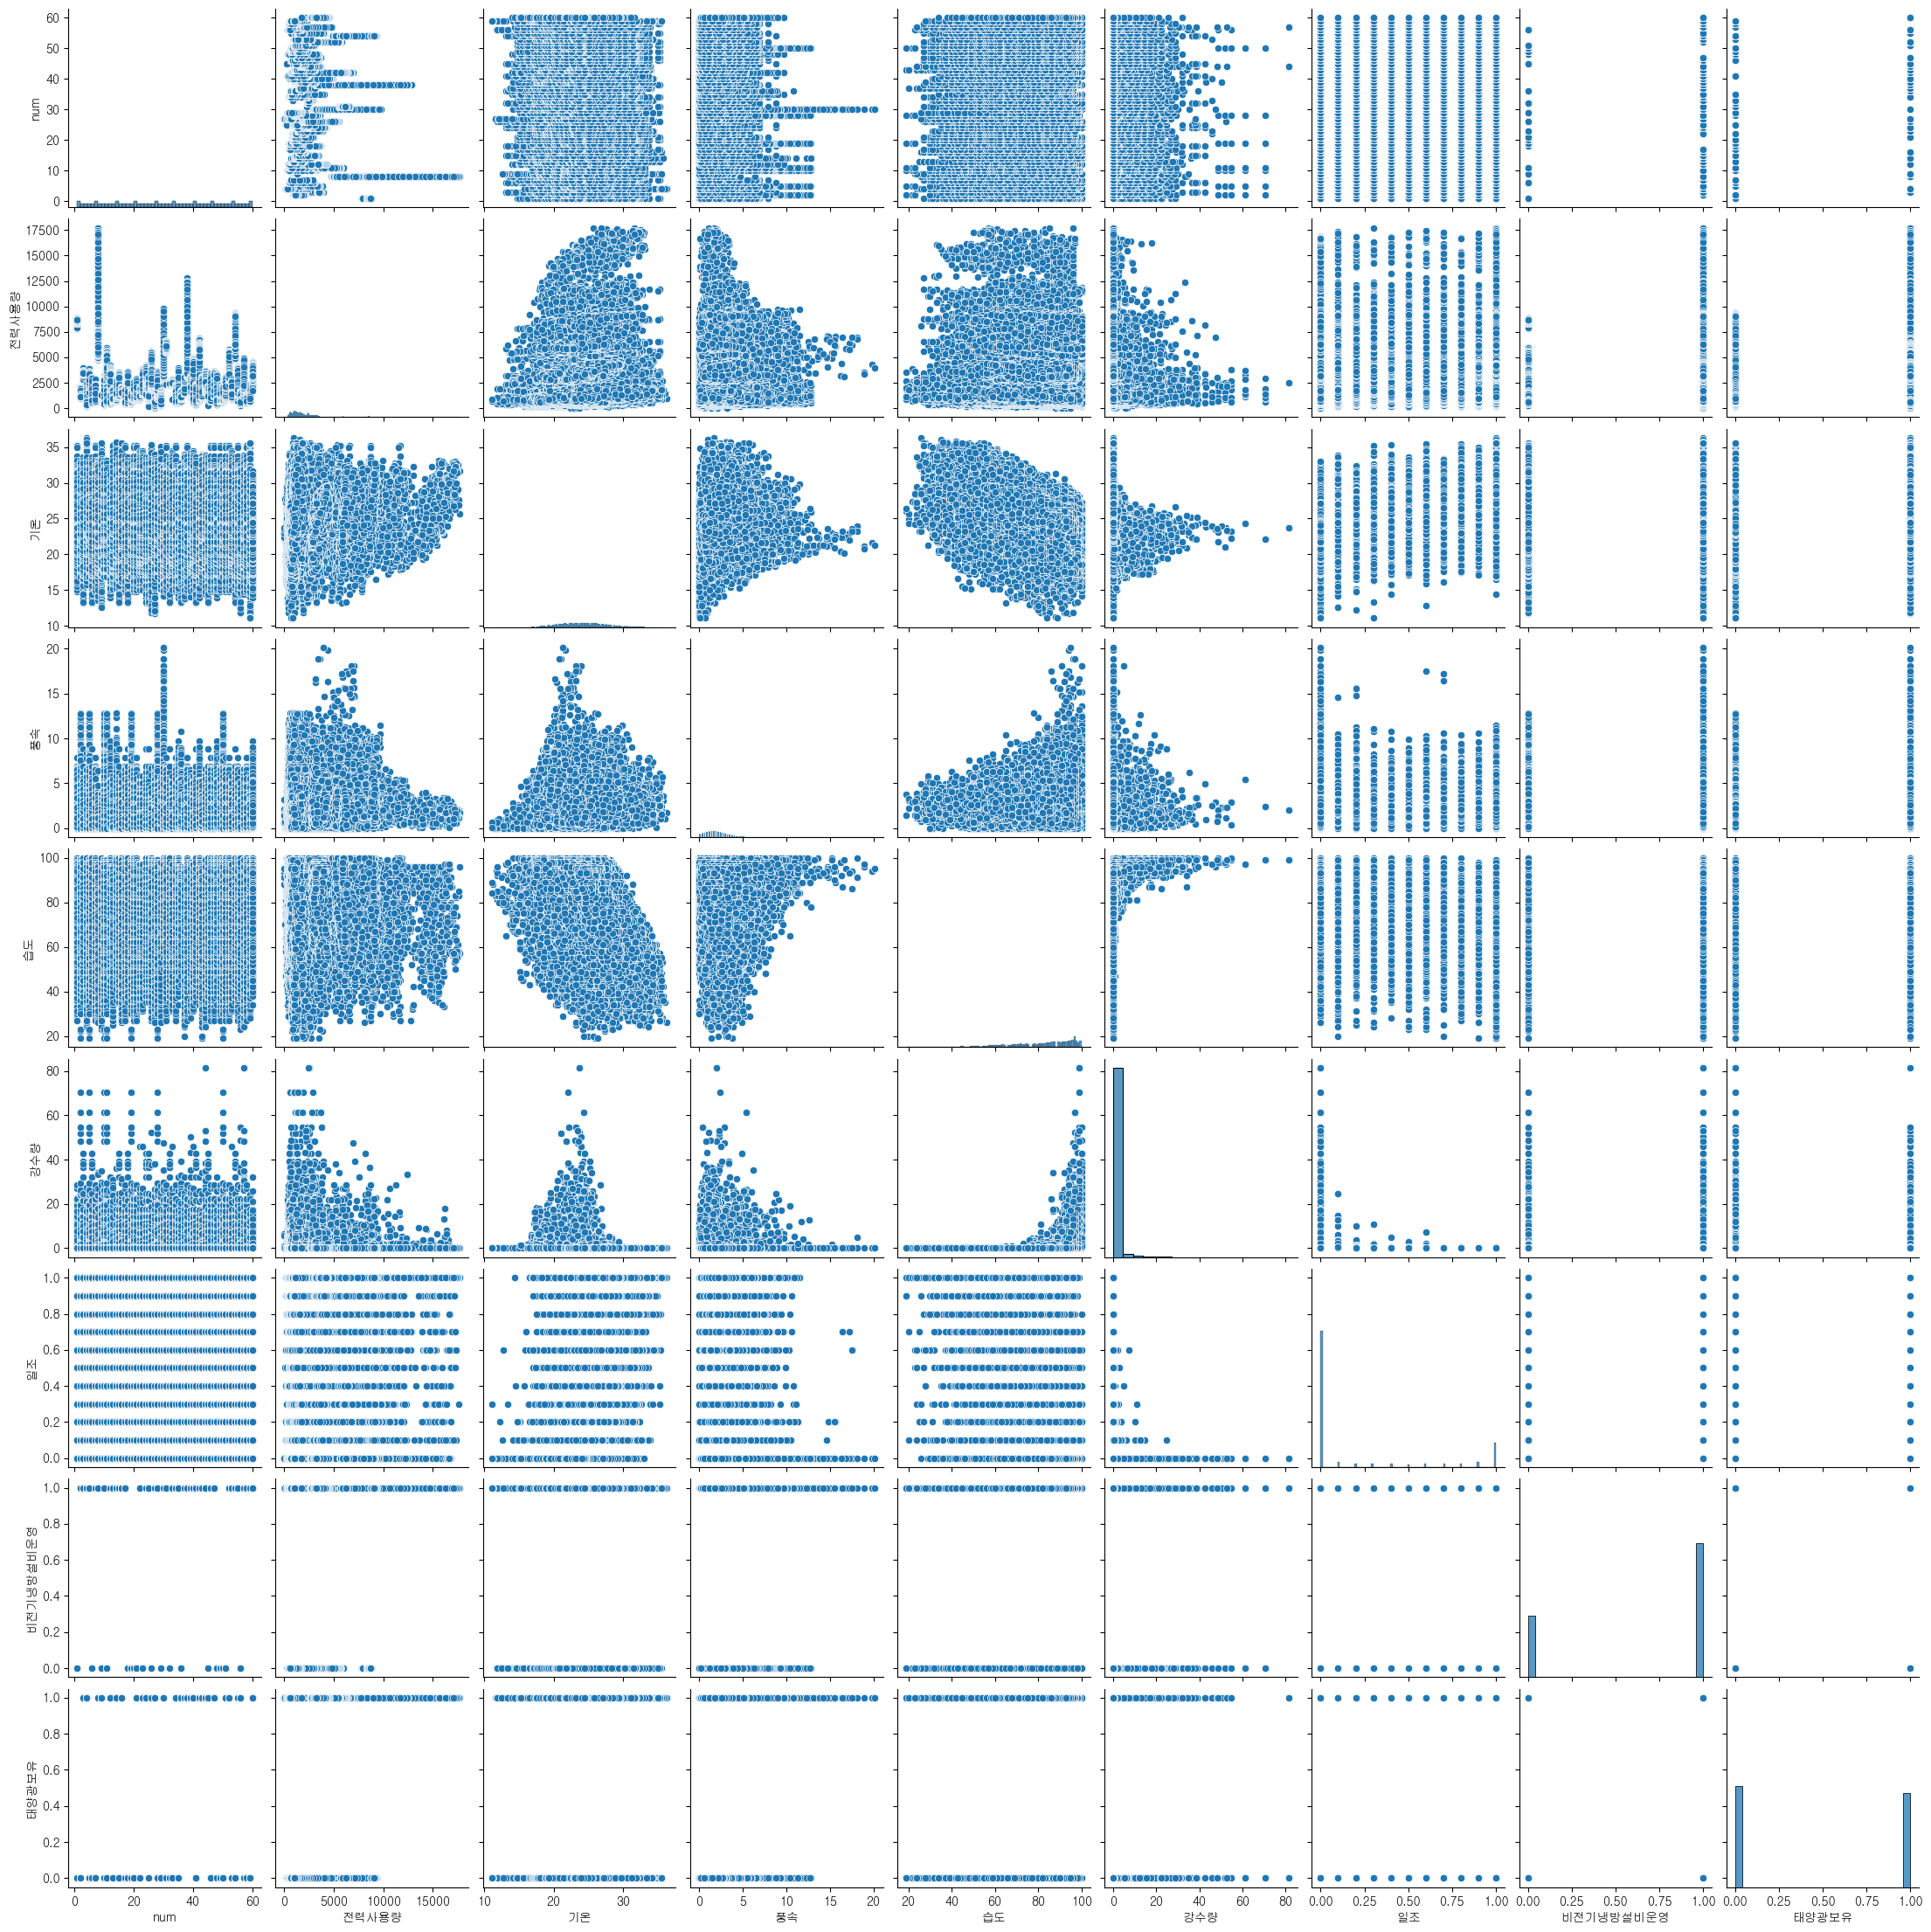

In [33]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
# 전체 변수에 해당하는 scatterplot 을 그리기 때문에 데이터 받아들이고 꼭 한번 사용하는 시각화 방법
sns.pairplot(data=df)

### heatmap
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

In [37]:
df.corr()

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량,-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온,0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속,-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도,0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
강수량,-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
일조,-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
비전기냉방설비운영,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
태양광보유,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000


<AxesSubplot:>

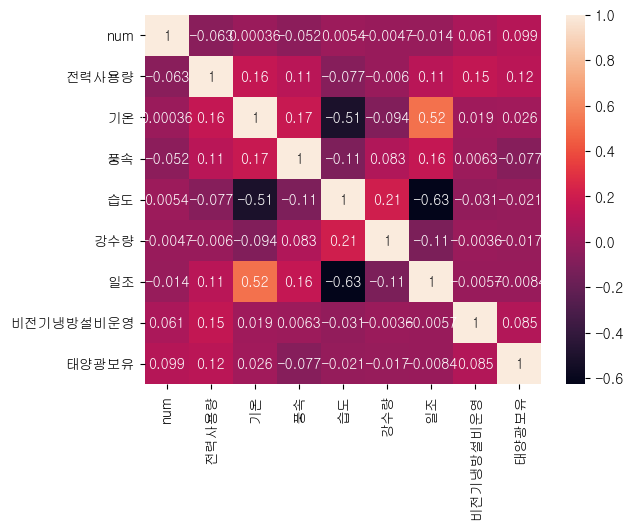

In [42]:
# 변수간 관계를 파악하는 용도로 사용
# 통계모델링 선형회귀모델 다중공선성 해결을 위해 특징 엔지니어링
sns.heatmap(data=df.corr(), annot=True)
# annot=True 상관계수표시 (프로젝트 할 때는 사용 X)

In [41]:
df1 = pd.read_csv('./data/energy2.csv', encoding='cp949')
df1.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

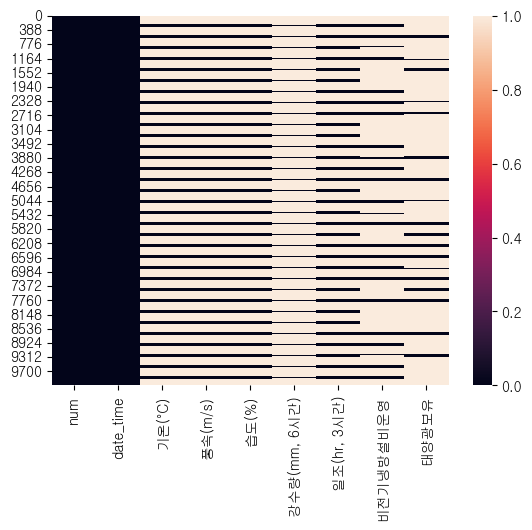

In [40]:
sns.heatmap(data=df1.isna())